In [9]:
import tensorflow as tf
import pandas as pd

In [10]:
# Der Datensatz ist der bekannte Iris-Datensatz
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [11]:
train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [12]:
test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [13]:
train_y = train.pop('Species')
test_y = test.pop('Species')

In [15]:
test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.9,3.0,4.2,1.5
1,6.9,3.1,5.4,2.1
2,5.1,3.3,1.7,0.5
3,6.0,3.4,4.5,1.6
4,5.5,2.5,4.0,1.3


In [16]:
# Verwenden vorgefertigter Schätze:
#1. Erstellen Sie eine oder mehrere Eingabefunktionen.
#2. Definieren Sie die Feature-Spalten des Modells.
#3. Instanziieren Sie einen Schätzer, indem Sie die Feature-Spalten und verschiedene Hyperparameter angeben.
#4. Rufen Sie eine oder mehrere Methoden für das Estimator-Objekt auf und übergeben Sie die entsprechende Eingabefunktion als Datenquelle. 

In [17]:
#1 Eingabefunktion gibt die Daten in Form: {'SepalLength': np.array([...]), 'SepalWidth': np.array([...]), ...}

def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    
    if training:
        dataset = dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)

In [18]:
# Feature-Spalte definiert wie mit den Eingaben umgegangen werden soll. Hier: 4 Zahlen
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

In [19]:
my_feature_columns

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [22]:
# Es gibt verschiedene Schätzer mit verschiedenen Stärken und Schwächen. Hier bietet sich DNNClassifier an, für Deep-Modelle die eine Klassifizierung mit mehreren Klassen durchführt

classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[30, 10],
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Nico\\AppData\\Local\\Temp\\tmpoujv5j4r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000293A542FC08>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
# Der estimator kann verwendet werden zum: Trainieren, Bewerten und Verwenden. Zunächst sollte er Trainiert werden...

classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True), steps= 5000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO

In [25]:
# Bewerten des Modells...
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

#average_loss (mittlerer Verlust pro Stichprobe)
#loss (mittlerer Verlust pro Mini-Batch)
#global_step (die Anzahl der durchgeführten Trainingsiterationen)

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-09T12:42:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmpoujv5j4r\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-09-09-12:42:46
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.53333336, average_loss = 0.661

In [26]:
# Verwenden des Modells mit eigenen, unbeschrifteten Daten
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

def input_fn(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predictions = classifier.predict(input_fn=lambda: input_fn(predict_x))

In [27]:
for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%), expected "{}"'.format(
        SPECIES[class_id], 100 * probability, expec))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmpoujv5j4r\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (68.2%), expected "Setosa"
Prediction is "Virginica" (54.4%), expected "Versicolor"
Prediction is "Virginica" (57.4%), expected "Virginica"


In [1]:
#############################################
#### Linear Model ##########################
#############################################

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

In [2]:
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [3]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived') # Entfernen der gesuchten Werte 
y_eval = dfeval.pop('survived')

In [4]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [5]:
dftrain.shape[0], dfeval.shape[0]

(627, 264)

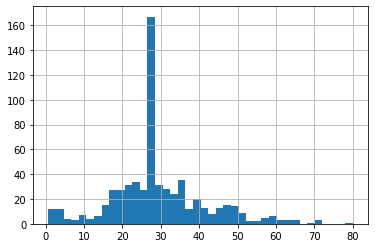

In [6]:
dftrain.age.hist(bins=40)

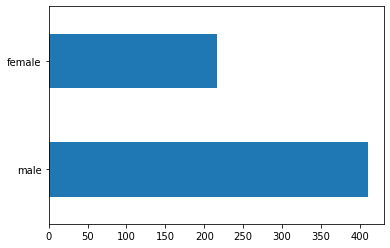

In [7]:
dftrain.sex.value_counts().plot(kind='barh')

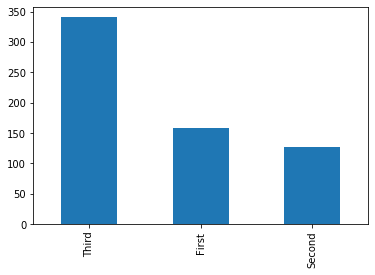

In [8]:
dftrain['class'].value_counts().plot(kind='bar')

Text(0, 0.5, '% survive')

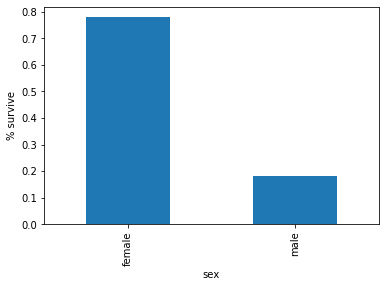

In [9]:
pd.concat([dftrain, y_train], axis= 1).groupby('sex').survived.mean().plot(kind='bar').set_ylabel('% survive')

In [17]:
# Schätzer verwenden Feature Spalten um zu beschreiben, wie die raw Eingabe Daten interpretiert werden sollen.
# Ein Schätzer erwartet ein Vektor aus Numerischen Eingaben UND Feature Spalten die beschreiben wie das Modell jedes Feature umwandeln sollen

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocab = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab))
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [20]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [21]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  print()
  print('A batch of class:', feature_batch['class'].numpy())
  print()
  print('A batch of Labels:', label_batch.numpy())

Some feature keys: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

A batch of class: [b'Third' b'Second' b'Second' b'Second' b'Third' b'Second' b'Second'
 b'First' b'Third' b'First']

A batch of Labels: [0 1 0 1 0 1 0 1 0 1]


In [23]:
age_col = feature_columns[7]
tf.keras.layers.DenseFeatures([age_col])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[34.5],
       [50. ],
       [23. ],
       [33. ],
       [40. ],
       [21. ],
       [26. ],
       [29. ],
       [44. ],
       [42. ]], dtype=float32)

In [25]:
gender_col = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_col)])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [26]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.7537879, 'accuracy_baseline': 0.625, 'auc': 0.8352311, 'auc_precision_recall': 0.79221, 'average_loss': 0.48844683, 'label/mean': 0.375, 'loss': 0.4820808, 'precision': 0.64912283, 'prediction/mean': 0.4291667, 'recall': 0.74747473, 'global_step': 200}


In [30]:
# Abgeleitete Feature Spalten helfen um den Datenbestand besser zu beschreiben. 
# Hier kann z.B. die Kombination Male & Age=30  && Male & Age=40 nicht richtig erfasst werden
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)

age_x_class = tf.feature_column.crossed_column(['age', 'class'], hash_bucket_size=100)

In [31]:
derived_feature_columns = [age_x_gender, age_x_class]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.7651515, 'accuracy_baseline': 0.625, 'auc': 0.8473217, 'auc_precision_recall': 0.7859594, 'average_loss': 0.46888065, 'label/mean': 0.375, 'loss': 0.4615779, 'precision': 0.6989247, 'prediction/mean': 0.36353582, 'recall': 0.65656567, 'global_step': 200}


INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmpl8n6hqco\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


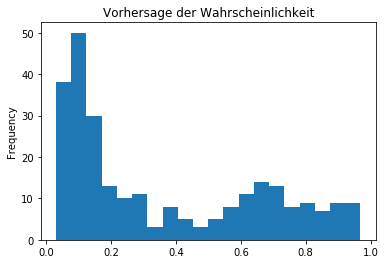

In [32]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title="Vorhersage der Wahrscheinlichkeit")

(0, 1.05)

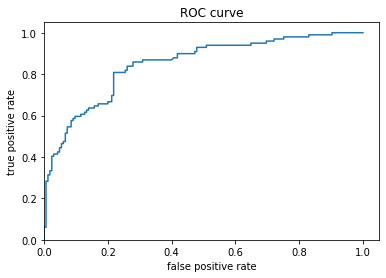

In [33]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

In [34]:
#####################################
### Boosted trees ###################
#####################################

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import clear_output
from matplotlib import pyplot as plt

# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [39]:
# Wie bereits bei dem Linearen Schätzer, werden IMMER Feature Spalten benötigt...

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

def one_hot_encoding(feature_name, vocab):
    return tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab))

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    # Da nicht numerisch -> One hot bois
    vocab = dftrain[feature_name].unique()
    feature_columns.append(one_hot_encoding(feature_name, vocab))
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [41]:
# Veranschaulichung was One Hot encoding denn so treibt. Jeder Wert in Liste bekommt Nr, beim encoden wird an dieser Position in der Liste 1 verwendet

example = dict(dftrain.head(1))
class_fc = tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list('class', ('First', 'Second', 'Third')))
print('Feature value: "{}"'.format(example['class'].iloc[0]))
print('One-hot encoded: ', tf.keras.layers.DenseFeatures([class_fc])(example).numpy())

Feature value: "Third"
One-hot encoded:  [[0. 0. 1.]]


In [43]:
# Alle features der Transformation auf einmal
tf.keras.layers.DenseFeatures(feature_columns)(example).numpy()

array([[22.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         7.25,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ]], dtype=float32)

In [44]:
NUM_EXAMPLES = len(y_train)

def make_input_fn(X, y, n_epochs=None, shuffle=True):
    def input_fn():
        dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
        if shuffle:
            dataset = dataset.shuffle(NUM_EXAMPLES)
            
        dataset = dataset.repeat(n_epochs) # Wiederholen so oft wie nötig
        dataset = dataset.batch(NUM_EXAMPLES) # In Memory training verwendet kein batching
        return dataset
    return input_fn

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, shuffle=False, n_epochs=1)

In [47]:
# So ziemlich das selbe wie oben. Ist ja auch das selbe vorgehen...

linear_est = tf.estimator.LinearClassifier(feature_columns)

# Training
linear_est.train(train_input_fn, max_steps = 100)

# Eval
result = linear_est.evaluate(eval_input_fn)
clear_output()
print(pd.Series(result))

accuracy                  0.765152
accuracy_baseline         0.625000
auc                       0.832844
auc_precision_recall      0.789631
average_loss              0.478908
label/mean                0.375000
loss                      0.478908
precision                 0.703297
prediction/mean           0.350790
recall                    0.646465
global_step             100.000000
dtype: float64


In [56]:
n_batches = 1
est = tf.estimator.BoostedTreesClassifier(feature_columns, n_batches_per_layer=n_batches)

est.train(train_input_fn, max_steps=100)

result = est.evaluate(eval_input_fn)
clear_output()
print(pd.Series(result))

accuracy                  0.833333
accuracy_baseline         0.625000
auc                       0.875237
auc_precision_recall      0.859974
average_loss              0.405130
label/mean                0.375000
loss                      0.405130
precision                 0.795699
prediction/mean           0.383990
recall                    0.747475
global_step             100.000000
dtype: float64


In [57]:
# Test: Was passiert, wenn auch bei dem boosted Tree abgeleitete features verwendet werden?
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)
age_x_class = tf.feature_column.crossed_column(['age', 'class'], hash_bucket_size=100)
derived_feature_columns = [age_x_gender, age_x_class]

n_batches = 1
est_test = tf.estimator.BoostedTreesClassifier(feature_columns+derived_feature_columns, n_batches_per_layer=n_batches)

est_test.train(train_input_fn, max_steps=100)

result_test = est_test.evaluate(eval_input_fn)
clear_output()
print(pd.Series(result_test))

accuracy                  0.810606
accuracy_baseline         0.625000
auc                       0.857729
auc_precision_recall      0.835434
average_loss              0.430468
label/mean                0.375000
loss                      0.430468
precision                 0.769231
prediction/mean           0.388880
recall                    0.707071
global_step             100.000000
dtype: float64


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmp58b1bxv2\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


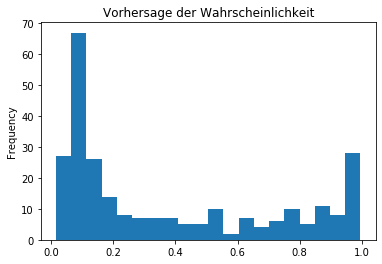

In [58]:
pred_dicts = list(est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title="Vorhersage der Wahrscheinlichkeit")
plt.show()

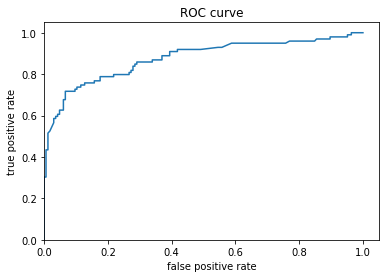

In [59]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

In [1]:
#######################################
### Boosted trees verstehen ###########
#######################################

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import clear_output

# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [3]:
# Wie immer brauchen wir Feautre spalten... Copy pasta von oben
tc = tf.feature_column

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

def one_hot_encoding(feature_name, vocab):
    return tc.indicator_column(tc.categorical_column_with_vocabulary_list(feature_name, vocab))

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    # Da nicht numerisch -> One hot bois
    vocab = dftrain[feature_name].unique()
    feature_columns.append(one_hot_encoding(feature_name, vocab))
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tc.numeric_column(feature_name, dtype=tf.float32))

In [4]:
# Copy Pasta #2 von Oben...

NUM_EXAMPLES = len(y_train)

def make_input_fn(X, y, n_epochs=None, shuffle=True):
    def input_fn():
        dataset = tf.data.Dataset.from_tensor_slices((X.to_dict(orient='list'), y))
        if shuffle:
            dataset = dataset.shuffle(NUM_EXAMPLES)
            
        dataset = (dataset).repeat(n_epochs).batch(NUM_EXAMPLES)
        return dataset
    return input_fn

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, shuffle=False, n_epochs=1)

In [5]:
## New Part: Advanced training og the model:
params = {
    'n_trees': 50,
    'max_depth': 3,
    'n_batches_per_layer': 1,
    'center_bias': True
}

est = tf.estimator.BoostedTreesClassifier(feature_columns, **params) #verwenden der Hyperparams
est.train(train_input_fn, max_steps=100)

results = est.evaluate(eval_input_fn)
clear_output()
pd.Series(results).to_frame()

,0
accuracy,0.803030
accuracy_baseline,0.625000
auc,0.868595
auc_precision_recall,0.850457
average_loss,0.418110
label/mean,0.375000
loss,0.418110
precision,0.752688
prediction/mean,0.386081
recall,0.707071


In [7]:
# Wenn die Daten in den RAM passen, ist es wesentlich schneller direkt aus diesem zu trainieren. Aber die Daten sollten dann NICHT batch'ed sein.
in_memory_params = dict(params)
in_memory_params['n_batches_per_layer'] = 1

# In-memory input_fn verwendet kein batching
def make_inmemory_train_input_fn(X, y):
  y = np.expand_dims(y, axis=1)
  def input_fn():
    return dict(X), y
  return input_fn
train_input_fn = make_inmemory_train_input_fn(dftrain, y_train)

# Train the model.
est = tf.estimator.BoostedTreesClassifier(
    feature_columns, 
    train_in_memory=True, 
    **in_memory_params)

est.train(train_input_fn)
clear_output()
print(est.evaluate(eval_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-11T15:04:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmpqulcrf3m\model.ckpt-153
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.33951s
INFO:tensorflow:Finished evaluation at 2020-09-11-15:04:22
INFO:tensorflow:Saving dict for global step 153: accuracy = 0.81439394, accuracy_baseline = 0.625, auc = 0.8692684, auc_precision_recall = 0.8528743, average_loss = 0.4144078, global_step = 153, label/mean = 0.375, loss = 0.4144078, precision = 0.7604167, prediction/mean = 0.3884691, recall = 0.7373737
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Saving 'checkpoint_path' summary for glob

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns_colors = sns.color_palette('colorblind') # Nice.

In [9]:
pred_dicts = list(est.experimental_predict_with_explanations(eval_input_fn))

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Nico\\AppData\\Local\\Temp\\tmpqulcrf3m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensor

In [10]:
# Mit directional feature contributions wird der Baum erklärt:
labels = y_eval.values
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
df_dfc = pd.DataFrame([pred['dfc'] for pred in pred_dicts])
df_dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
age,264.0,-0.026201,0.093400,-0.147969,-0.076613,-0.054171,0.003090,0.505813
sex,264.0,0.006555,0.107802,-0.097792,-0.074628,-0.072858,0.138226,0.182456
class,264.0,0.017197,0.093079,-0.133776,-0.043060,-0.041724,0.033055,0.231730
deck,264.0,-0.018092,0.032576,-0.094638,-0.042912,-0.032754,0.001897,0.199893
embark_town,264.0,-0.007019,0.031440,-0.056042,-0.017526,-0.015517,-0.003948,0.086491
fare,264.0,0.027099,0.089148,-0.224306,-0.028055,-0.002334,0.072627,0.285098
n_siblings_spouses,264.0,0.001351,0.026091,-0.133110,0.002419,0.003337,0.006167,0.103482
parch,264.0,0.000020,0.011432,-0.098722,0.000654,0.000864,0.001482,0.040270
alone,264.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
# Summe von DFCs + Bias == Wahrscheinlichkeit
bias = pred_dicts[0]['bias']
dfc_prob = df_dfc.sum(axis=1) + bias
np.testing.assert_almost_equal(dfc_prob.values, probs.values)

In [12]:
# Copy & Pasta von Plotting Code.
def _get_color(value):
    """To make positive DFCs plot green, negative DFCs plot red."""
    green, red = sns.color_palette()[2:4]
    if value >= 0: return green
    return red

def _add_feature_values(feature_values, ax):
    """Display feature's values on left of plot."""
    x_coord = ax.get_xlim()[0]
    OFFSET = 0.15
    for y_coord, (feat_name, feat_val) in enumerate(feature_values.items()):
        t = plt.text(x_coord, y_coord - OFFSET, '{}'.format(feat_val), size=12)
        t.set_bbox(dict(facecolor='white', alpha=0.5))
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_weight('bold')
    t = plt.text(x_coord, y_coord + 1 - OFFSET, 'feature\nvalue',
    fontproperties=font, size=12)

def plot_example(example):
  TOP_N = 8 # View top 8 features.
  sorted_ix = example.abs().sort_values()[-TOP_N:].index  # Sort by magnitude.
  example = example[sorted_ix]
  colors = example.map(_get_color).tolist()
  ax = example.to_frame().plot(kind='barh',
                          color=[colors],
                          legend=None,
                          alpha=0.75,
                          figsize=(10,6))
  ax.grid(False, axis='y')
  ax.set_yticklabels(ax.get_yticklabels(), size=14)

  # Add feature values.
  _add_feature_values(dfeval.iloc[ID][sorted_ix], ax)
  return ax

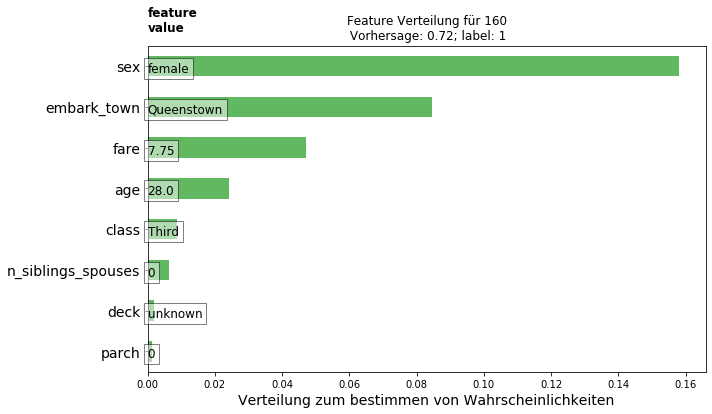

In [23]:
# plot für einen passagier
ID = 160
example = df_dfc.iloc[ID]
TOP_N = 8
sorted_ix = example.abs().sort_values()[-TOP_N:].index
ax = plot_example(example)
ax.set_title('Feature Verteilung für {}\n Vorhersage: {:1.2f}; label: {}'.format(ID, probs[ID], labels[ID]))
ax.set_xlabel('Verteilung zum bestimmen von Wahrscheinlichkeiten', size=14)
plt.show()

In [24]:
# Copy & Pasta Plot Code
def dist_violin_plot(df_dfc, ID):
  # Initialize plot.
  fig, ax = plt.subplots(1, 1, figsize=(10, 6))

  # Create example dataframe.
  TOP_N = 8  # View top 8 features.
  example = df_dfc.iloc[ID]
  ix = example.abs().sort_values()[-TOP_N:].index
  example = example[ix]
  example_df = example.to_frame(name='dfc')

  # Add contributions of entire distribution.
  parts=ax.violinplot([df_dfc[w] for w in ix],
                 vert=False,
                 showextrema=False,
                 widths=0.7,
                 positions=np.arange(len(ix)))
  face_color = sns_colors[0]
  alpha = 0.15
  for pc in parts['bodies']:
      pc.set_facecolor(face_color)
      pc.set_alpha(alpha)

  # Add feature values.
  _add_feature_values(dfeval.iloc[ID][sorted_ix], ax)

  # Add local contributions.
  ax.scatter(example,
              np.arange(example.shape[0]),
              color=sns.color_palette()[2],
              s=100,
              marker="s",
              label='contributions for example')

  # Legend
  # Proxy plot, to show violinplot dist on legend.
  ax.plot([0,0], [1,1], label='eval set contributions\ndistributions',
          color=face_color, alpha=alpha, linewidth=10)
  legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large',
                     frameon=True)
  legend.get_frame().set_facecolor('white')

  # Format plot.
  ax.set_yticks(np.arange(example.shape[0]))
  ax.set_yticklabels(example.index)
  ax.grid(False, axis='y')
  ax.set_xlabel('Contribution to predicted probability', size=14)

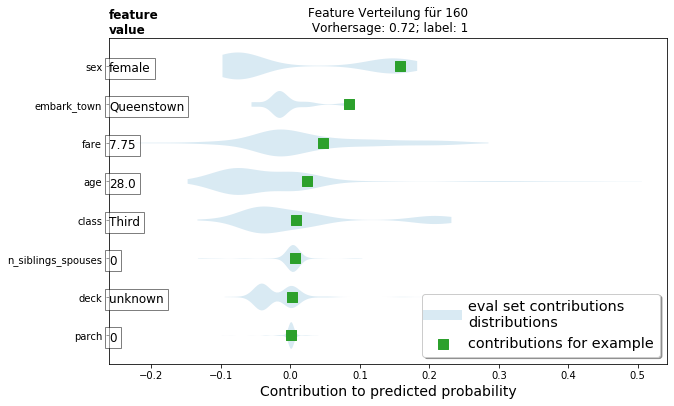

In [25]:
dist_violin_plot(df_dfc, ID)
plt.title('Feature Verteilung für {}\n Vorhersage: {:1.2f}; label: {}'.format(ID, probs[ID], labels[ID]))
plt.show()

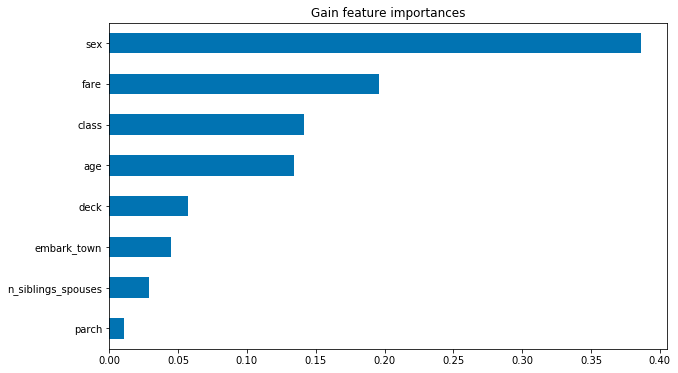

In [29]:
# Gain-based Feature importances - Wie wichtig ist ein bestimmtes Feature?
importances = est.experimental_feature_importances(normalize=True)
df_imp = pd.Series(importances)

N = 8
ax = (df_imp.iloc[0:N][::-1].plot(kind='barh', color=sns_colors[0], title='Gain feature importances', figsize=(10, 6)))
ax.grid(False, axis='y')

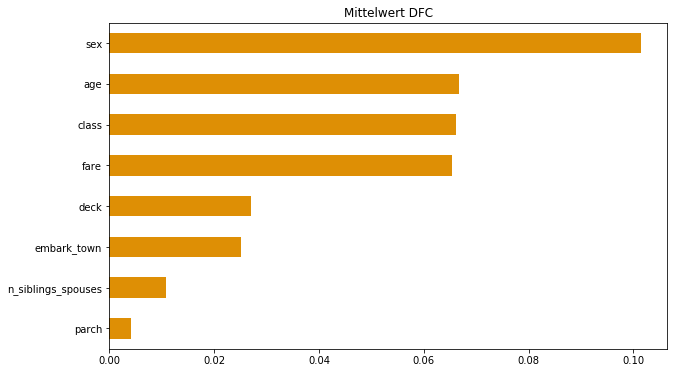

In [30]:
dfc_mean = df_dfc.abs().mean()
N = 8
sorted_ix = dfc_mean.abs().sort_values()[-N:].index  # Avg
ax = dfc_mean[sorted_ix].plot(kind='barh', color=sns_colors[1], title='Mittelwert DFC', figsize=(10, 6))
ax.grid(False, axis='y')

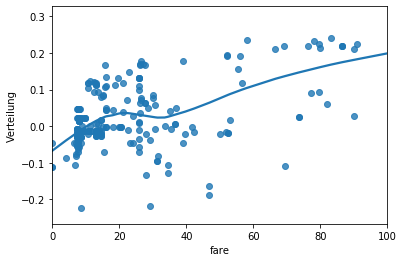

In [31]:
FEATURE = 'fare'
feature = pd.Series(df_dfc[FEATURE].values, index=dfeval[FEATURE].values).sort_index()
ax = sns.regplot(feature.index.values, feature.values, lowess=True)
ax.set_ylabel('Verteilung')
ax.set_xlabel(FEATURE)
ax.set_xlim(0, 100)
plt.show()

In [32]:
# Copy plot Code...
def permutation_importances(est, X_eval, y_eval, metric, features):
    """Column by column, shuffle values and observe effect on eval set.

    source: http://explained.ai/rf-importance/index.html
    A similar approach can be done during training. See "Drop-column importance"
    in the above article."""
    baseline = metric(est, X_eval, y_eval)
    imp = []
    for col in features:
        save = X_eval[col].copy()
        X_eval[col] = np.random.permutation(X_eval[col])
        m = metric(est, X_eval, y_eval)
        X_eval[col] = save
        imp.append(baseline - m)
    return np.array(imp)

def accuracy_metric(est, X, y):
    """TensorFlow estimator accuracy."""
    eval_input_fn = make_input_fn(X,
                                  y=y,
                                  shuffle=False,
                                  n_epochs=1)
    return est.evaluate(input_fn=eval_input_fn)['accuracy']

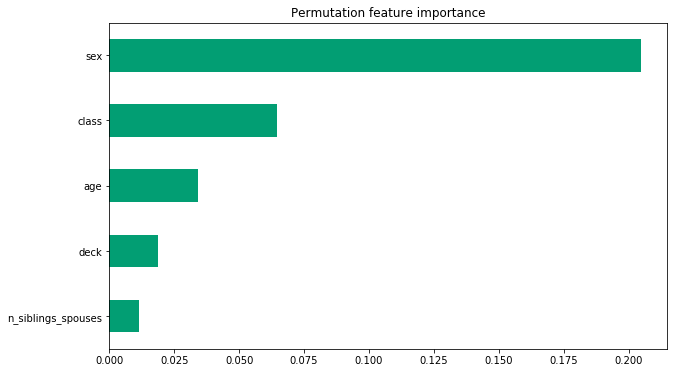

In [34]:
features = CATEGORICAL_COLUMNS + NUMERIC_COLUMNS
importances = permutation_importances(est, dfeval, y_eval, accuracy_metric, features)
df_imp = pd.Series(importances, index=features)

sorted_ix = df_imp.abs().sort_values().index
ax = df_imp[sorted_ix][-5:].plot(kind='barh', color=sns_colors[2], figsize=(10, 6))
ax.grid(False, axis='y')
ax.set_title('Permutation feature importance')
clear_output()
plt.show()

In [35]:
# Visualisieren 
# Daten der Formel: z = x * e ^-x² - y², Ges: z, x, y = feature
from numpy.random import uniform
from scipy.interpolate import griddata

# Create fake data
npts = 5000
x = uniform(-2, 2, npts)
y = uniform(-2, 2, npts)
z = x*np.exp(-x**2 - y**2)
xy = np.zeros((2,np.size(x)))
xy[0] = x
xy[1] = y
xy = xy.T

In [36]:
df = pd.DataFrame({'x': x, 'y': y, 'z': z})

xi = np.linspace(-2.0, 2.0, 200),
yi = np.linspace(-2.1, 2.1, 210),
xi,yi = np.meshgrid(xi, yi)

df_predict = pd.DataFrame({
    'x' : xi.flatten(),
    'y' : yi.flatten(),
})
predict_shape = xi.shape

In [37]:
def plot_contour(x, y, z, **kwargs):
    # Grid the data.
    plt.figure(figsize=(10, 8))
    # Contour the gridded data, plotting dots at the nonuniform data points.
    CS = plt.contour(x, y, z, 15, linewidths=0.5, colors='k')
    CS = plt.contourf(x, y, z, 15, vmax=abs(zi).max(), vmin=-abs(zi).max(), cmap='RdBu_r')
    plt.colorbar()  # Draw colorbar.
    # Plot data points.
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

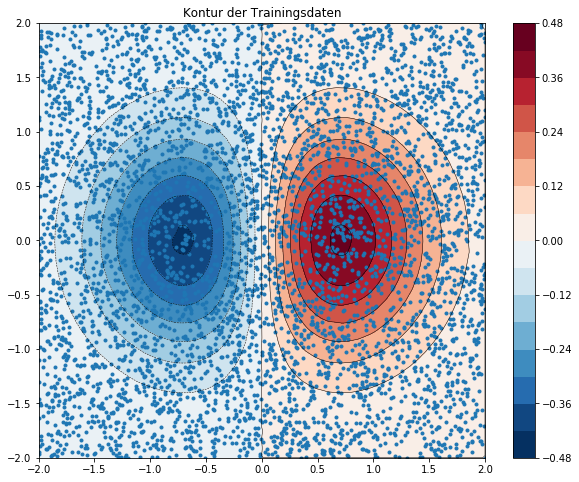

In [38]:
zi = griddata(xy, z, (xi, yi), method='linear', fill_value='0')
plot_contour(xi, yi, zi)
plt.scatter(df.x, df.y, marker='.')
plt.title('Kontur der Trainingsdaten')
plt.show()

In [40]:
fc = [tf.feature_column.numeric_column('x'), tf.feature_column.numeric_column('y')]

def predict(est):
    '''Vorraussagen für einen gegebenen Schätzer'''
    predict_input_fn = lambda: tf.data.Dataset.from_tensors(dict(df_predict))
    preds = np.array([p['predictions'][0] for p in est.predict(predict_input_fn)])
    return preds.reshape(predict_shape)

In [42]:
#1 Linear:
train_input_fn = make_input_fn(df, df.z)
est = tf.estimator.LinearRegressor(fc)
est.train(train_input_fn, max_steps=500);
clear_output()

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmprczxd2to\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


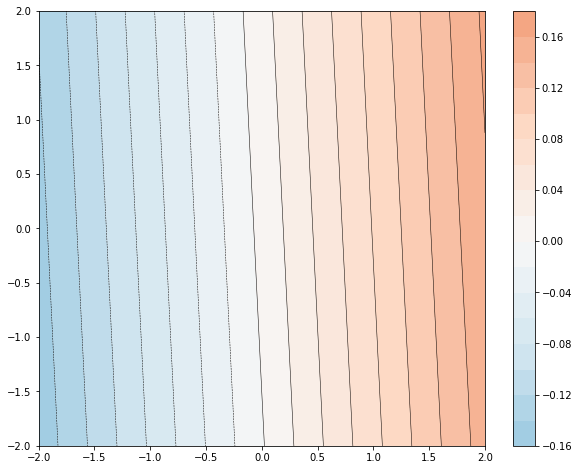

In [43]:
plot_contour(xi, yi, predict(est))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmp7g2m6txx\model.ckpt-150
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


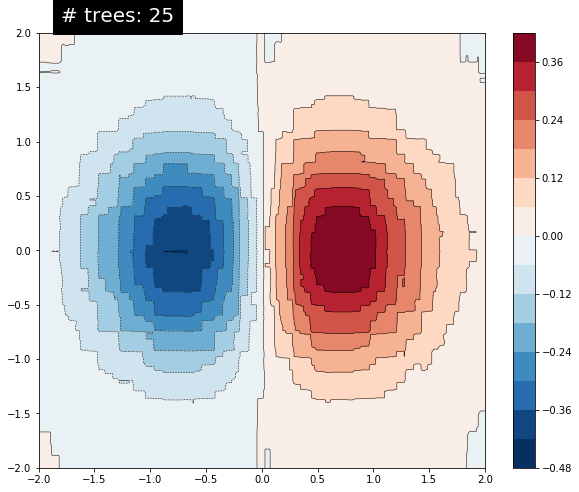

In [46]:
#2 Boosted Tree

n_trees = 25

est = tf.estimator.BoostedTreesRegressor(fc, n_batches_per_layer=1, n_trees=n_trees)
est.train(train_input_fn, max_steps=500)
clear_output()
plot_contour(xi, yi, predict(est))
plt.text(-1.8, 2.1, '# trees: {}'.format(n_trees), color='w', backgroundcolor='black', size=20)
plt.show()

In [1]:
##################################
### Umwandeln Keras Model ########
##################################

# Als letztes: Wie kann man einen Schätzer aus einem Keras Modell erstellen?

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import tempfile

In [2]:
# Einfaches Multi layer perzeptron...

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [3]:
def input_fn():
  split = tfds.Split.TRAIN
  dataset = tfds.load('iris', split=split, as_supervised=True)
  dataset = dataset.map(lambda features, labels: ({'dense_input':features}, labels))
  dataset = dataset.batch(32).repeat()
  return dataset

In [4]:
for features_batch, labels_batch in input_fn().take(1):
  print(features_batch)
  print(labels_batch)

{'dense_input': <tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[5.1, 3.4, 1.5, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [5.7, 2.8, 4.5, 1.3],
       [6.8, 3.2, 5.9, 2.3],
       [5.2, 3.4, 1.4, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [5.5, 2.4, 3.7, 1. ],
       [4.6, 3.4, 1.4, 0.3],
       [7.7, 2.8, 6.7, 2. ],
       [7. , 3.2, 4.7, 1.4],
       [4.6, 3.2, 1.4, 0.2],
       [6.5, 3. , 5.2, 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [4.8, 3. , 1.4, 0.1],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [6.7, 3.3, 5.7, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [5. , 3. , 1.6, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.1, 3. , 4.6, 1.4],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 2.7, 3.9, 1.4],
       [6.7, 3. , 5. , 1.7],
       [5.7, 2.6, 3.5, 1. ]], dtype=

In [5]:
# Erstellen des Schätzers aus diesem Keras Modell:
model_dir = tempfile.mkdtemp()
keras_estimator = tf.keras.estimator.model_to_estimator(keras_model=model, model_dir=model_dir)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using the Keras model provided.


INFO:tensorflow:Using the Keras model provided.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Nico\\AppData\\Local\\Temp\\tmp081dapf9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Nico\\AppData\\Local\\Temp\\tmp081dapf9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [6]:
keras_estimator.train(input_fn=input_fn, steps=500)
eval_result = keras_estimator.evaluate(input_fn=input_fn, steps=10)
print(eval_result)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='C:\\Users\\Nico\\AppData\\Local\\Temp\\tmp081dapf9\\keras\\keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='C:\\Users\\Nico\\AppData\\Local\\Temp\\tmp081dapf9\\keras\\keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting from: C:\Users\Nico\AppData\Local\Temp\tmp081dapf9\keras\keras_model.ckpt


INFO:tensorflow:Warm-starting from: C:\Users\Nico\AppData\Local\Temp\tmp081dapf9\keras\keras_model.ckpt


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-started 4 variables.


INFO:tensorflow:Warm-started 4 variables.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Nico\AppData\Local\Temp\tmp081dapf9\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Nico\AppData\Local\Temp\tmp081dapf9\model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 1.2493277, step = 0


INFO:tensorflow:loss = 1.2493277, step = 0


INFO:tensorflow:global_step/sec: 1497.15


INFO:tensorflow:global_step/sec: 1497.15


INFO:tensorflow:loss = 0.66884816, step = 100 (0.068 sec)


INFO:tensorflow:loss = 0.66884816, step = 100 (0.068 sec)


INFO:tensorflow:global_step/sec: 2005.34


INFO:tensorflow:global_step/sec: 2005.34


INFO:tensorflow:loss = 0.57383835, step = 200 (0.051 sec)


INFO:tensorflow:loss = 0.57383835, step = 200 (0.051 sec)


INFO:tensorflow:global_step/sec: 1966.01


INFO:tensorflow:global_step/sec: 1966.01


INFO:tensorflow:loss = 0.44526362, step = 300 (0.050 sec)


INFO:tensorflow:loss = 0.44526362, step = 300 (0.050 sec)


INFO:tensorflow:global_step/sec: 1966.06


INFO:tensorflow:global_step/sec: 1966.06


INFO:tensorflow:loss = 0.35841614, step = 400 (0.051 sec)


INFO:tensorflow:loss = 0.35841614, step = 400 (0.051 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 500...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 500...


INFO:tensorflow:Saving checkpoints for 500 into C:\Users\Nico\AppData\Local\Temp\tmp081dapf9\model.ckpt.


INFO:tensorflow:Saving checkpoints for 500 into C:\Users\Nico\AppData\Local\Temp\tmp081dapf9\model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 500...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 500...


INFO:tensorflow:Loss for final step: 0.3292021.


INFO:tensorflow:Loss for final step: 0.3292021.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-09-11T15:47:01Z


INFO:tensorflow:Starting evaluation at 2020-09-11T15:47:01Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmp081dapf9\model.ckpt-500


INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmp081dapf9\model.ckpt-500


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [1/10]


INFO:tensorflow:Evaluation [1/10]


INFO:tensorflow:Evaluation [2/10]


INFO:tensorflow:Evaluation [2/10]


INFO:tensorflow:Evaluation [3/10]


INFO:tensorflow:Evaluation [3/10]


INFO:tensorflow:Evaluation [4/10]


INFO:tensorflow:Evaluation [4/10]


INFO:tensorflow:Evaluation [5/10]


INFO:tensorflow:Evaluation [5/10]


INFO:tensorflow:Evaluation [6/10]


INFO:tensorflow:Evaluation [6/10]


INFO:tensorflow:Evaluation [7/10]


INFO:tensorflow:Evaluation [7/10]


INFO:tensorflow:Evaluation [8/10]


INFO:tensorflow:Evaluation [8/10]


INFO:tensorflow:Evaluation [9/10]


INFO:tensorflow:Evaluation [9/10]


INFO:tensorflow:Evaluation [10/10]


INFO:tensorflow:Evaluation [10/10]


INFO:tensorflow:Inference Time : 0.17354s


INFO:tensorflow:Inference Time : 0.17354s


INFO:tensorflow:Finished evaluation at 2020-09-11-15:47:01


INFO:tensorflow:Finished evaluation at 2020-09-11-15:47:01


INFO:tensorflow:Saving dict for global step 500: global_step = 500, loss = 0.3066649


INFO:tensorflow:Saving dict for global step 500: global_step = 500, loss = 0.3066649


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: C:\Users\Nico\AppData\Local\Temp\tmp081dapf9\model.ckpt-500


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: C:\Users\Nico\AppData\Local\Temp\tmp081dapf9\model.ckpt-500


{'loss': 0.3066649, 'global_step': 500}
